In [1]:
# Simulation of the price and payoff of a European call option using Heston model

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def heston_simu(S0, K, r, T, v0, sig, k, theta, rho, n, N):
    dt = N/T
    mean = (0,0)
    cov = [[dt, rho*dt],[rho*dt, dt]]
    st_vec = np.empty(n)
    vt_vec = np.empty(n)
    payoff_vec = np.empty(n)
    price_vec = np.empty(n)
    
    for i in range(n):
        x = np.random.multivariate_normal(mean, cov, (N,1))
        st = S0
        vt = v0
        
        for j in range(N):
            dst = r*st*dt + np.sqrt(vt)*st*x[j][0][0]
            dvt = k*(theta-vt)*dt + sig*np.sqrt(vt)*x[j][0][1]
            st += dst
            vt += dvt
            if vt <0:
                vt = -vt
            
        payoff_vec[i] = max(st-K,0)
        price_vec = payoff_vec*np.exp(-r*T)
        st_vec[i] = st
        vt_vec[i] = vt
    
    plt.hist(st_vec, bins=100)
    plt.title("Terminal stock price distribution")
    plt.xlabel("stock price")
    plt.ylabel("frequency per" + str(n) + "trials")
    plt.show()
    
    return price_vec

C:\Users\diego\AppData\Local\Temp\ipykernel_14708\1140199905.py:16: RuntimeWarning: overflow encountered in double_scalars
  dst = r*st*dt + np.sqrt(vt)*st*x[j][0][0]
C:\Users\diego\AppData\Local\Temp\ipykernel_14708\1140199905.py:16: RuntimeWarning: invalid value encountered in double_scalars
  dst = r*st*dt + np.sqrt(vt)*st*x[j][0][0]


ValueError: autodetected range of [nan, nan] is not finite

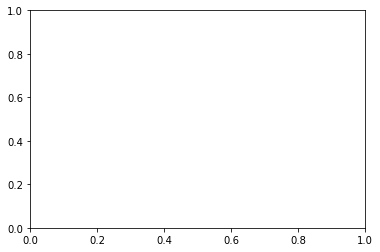

In [41]:
# heston_simu(S0, K, r, T, v0, sig, k, theta, rho, n, N)
heston_simu(120, 100, 0.025, 0.5, 0.05, 0.25, 1, 0.1, -0.5, 1, 126)